<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Importing-Data-Sets">Importing Data </a></li>
    <li><a href="#Data-Wrangling">Data Wrangling</a> </li>
    <li><a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a></li>
    <li><a href="#Model-Development">Model Development</a></li>
    <li><a href="#Model-Evaluation-and-Refinement">Model Evaluation and Refinement</a></li>
</a></li>


<hr>


## **Import the required libraries**


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns

from scipy.stats import boxcox
from sklearn.cluster import KMeans
#!pip install geopy
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.pipeline import Pipeline
%matplotlib inline

from functions import *

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# Automatically Reload Changes 
%load_ext autoreload
%autoreload 2

# Importing Data Sets


Download the dataset by running the cell below.


In [7]:
# !pip install gdown
import gdown

# Use the Google Drive file ID in the URL (extract it from the shareable link)
file_id = '13_7FNnO88zWwAmJdg6lejZAwdlHJiAW6'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'kc_house_data.csv'

# Download the file
gdown.download(url, output, quiet=False)

df = pd.read_csv(output, index_col='id')
df.head()


Downloading...
From: https://drive.google.com/uc?id=13_7FNnO88zWwAmJdg6lejZAwdlHJiAW6
To: /Users/sam/JDA_Coursera_Python/Course7_Data_Analysis/project/kc_house_data.csv
100%|██████████| 2.52M/2.52M [00:00<00:00, 10.1MB/s]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 1

In [9]:
df["date"] = pd.to_datetime(df["date"], format='%Y%m%dT%H%M%S')

# Data Wrangling


In [11]:
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


check missing values in each column


In [13]:
missing_values_table(df)

Number of columns of this dataframe is 20.
Columns with missing values are 0.


,Missing Values,% of Total Values


There are no missing values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode   

# Exploratory Data Analysis


In [17]:
summarize_dataframe(df)


Data Total Number of Each Type:
 int64             14
float64            5
datetime64[ns]     1
Name: count, dtype: int64

Float Types Count:
 price        4028
bathrooms      30
floors          6
lat          5034
long          752
dtype: int64

Integer Types Count:
 bedrooms           13
sqft_living      1038
sqft_lot         9782
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
sqft_living15     777
sqft_lot15       8689
dtype: int64

Object Types Count:
 Series([], dtype: float64)

Data Dimension: (21613, 20)


In [18]:
print("Bedrooms:", df['bedrooms'].unique())
print("\nBathroom", df['bathrooms'].unique())
print("\nFloor:", df['floors'].unique())

Bedrooms: [ 3  2  4  5  1  6  7  0  8  9 11 10 33]

Bathroom [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]

Floor: [1.  2.  1.5 3.  2.5 3.5]


Unique numbers of bedrooms are ok. for Bathroom and Floor, we will convert to interger number

In [20]:
df = convert_to_integer(df, min_unique=2, max_unique=30)

Converted columns to integer: ['bathrooms', 'floors']


In [21]:
print("\nBathroom", df['bathrooms'].unique())
print("\nFloor:", df['floors'].unique())


Bathroom [1 2 3 4 0 5 6 8 7]

Floor: [1 2 3]


In [22]:
# fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

# plt.subplot(1, 2, 1)
# plt.title('Price distribution')
# sns.histplot(df['price'], color='#021841ff')

# plt.subplot(1, 2, 2)
# plt.title('Adjusted price distribution')
# df_purged = df[df.price > df.price.quantile(0.95)]
# df = df[df.price <= df.price.quantile(0.95)]
# sns.histplot(df['price'], color='#021841ff')

# plt.tight_layout()
# plt.show()

In [23]:
# df[['price']].describe().apply(lambda s: s.apply('{0:.2f}'.format))

In [24]:
# purged = df_purged.shape[0]
# percent = purged/(purged+df.shape[0])
# print('Purged rows: {} ({:.3f})'.format(purged, percent))

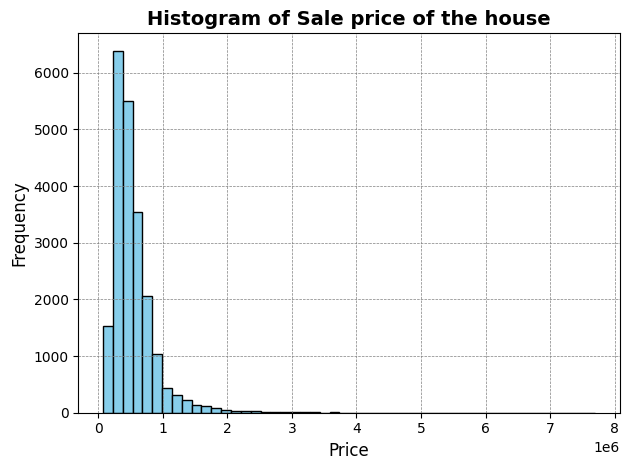

In [25]:
plot_histogram(df, column='price',bins=50 , title='Sale price of the house', xlabel='Price')

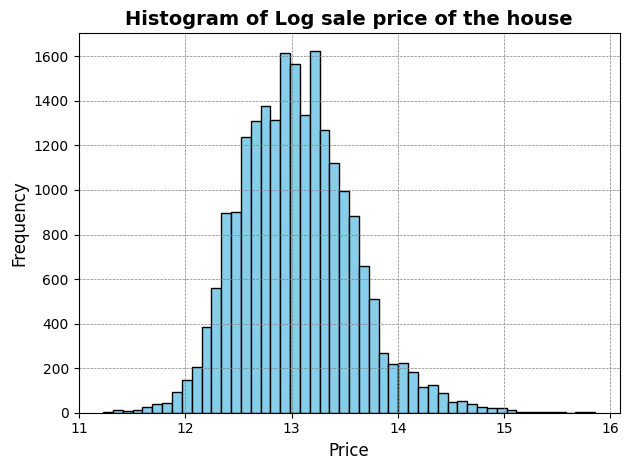

In [26]:
#log transformation
df['log_price'] = np.log(df['price'])
plot_histogram(df, column='log_price',bins=50 , title='Log sale price of the house', xlabel='Price')

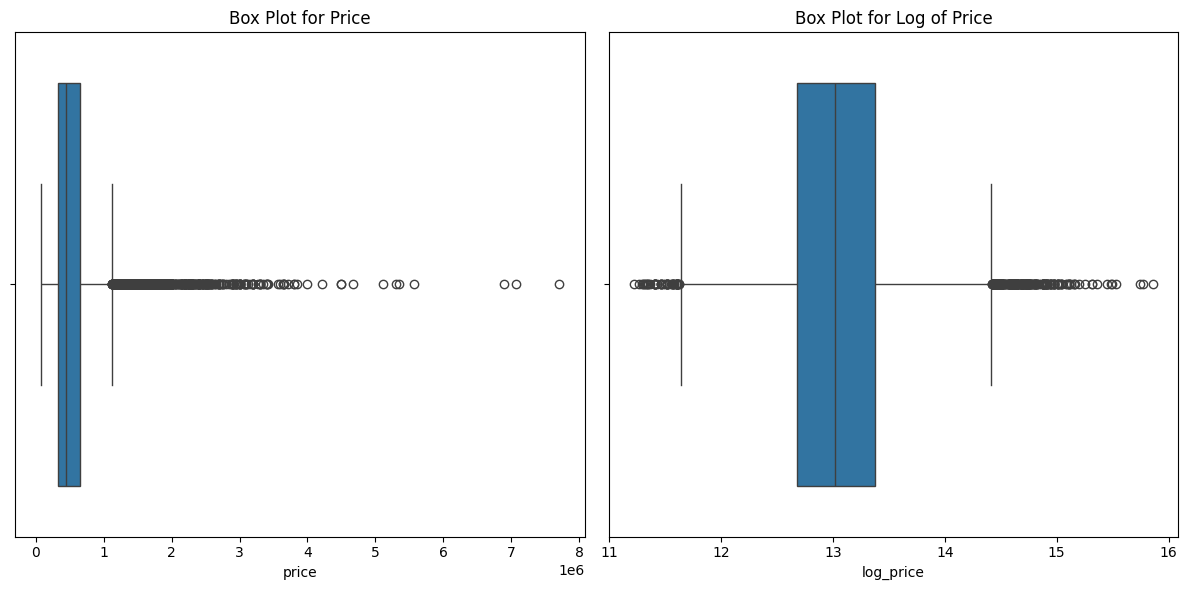

In [27]:
# Create subplots for two box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for 'price'
sns.boxplot(data=df, x='price', ax=axes[0])
axes[0].set_title('Box Plot for Price')

# Box plot for 'log_price'
sns.boxplot(data=df, x='log_price', ax=axes[1])
axes[1].set_title('Box Plot for Log of Price')

# Show the plots
plt.tight_layout()
plt.show()


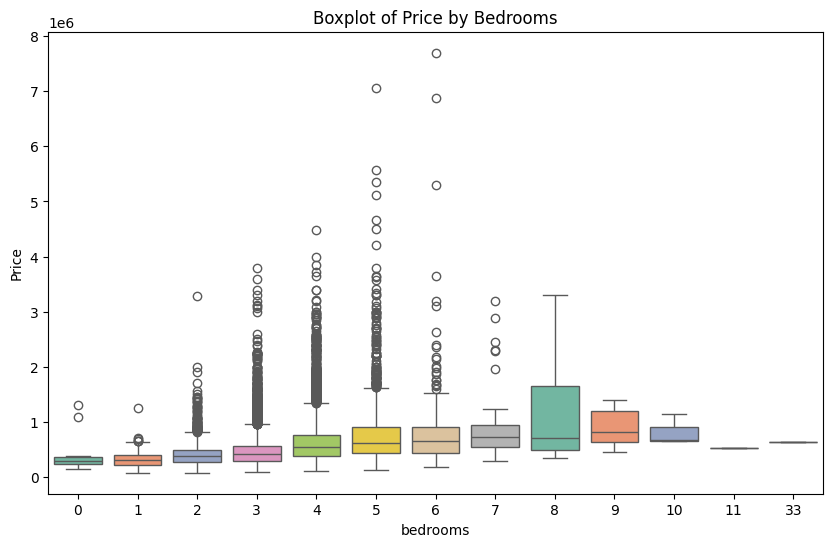

In [28]:
plot_boxplot_category(df, categorical_column='bedrooms', target_column='price',
                      title="Boxplot of Price by Bedrooms", x_label="bedrooms", y_label="Price")

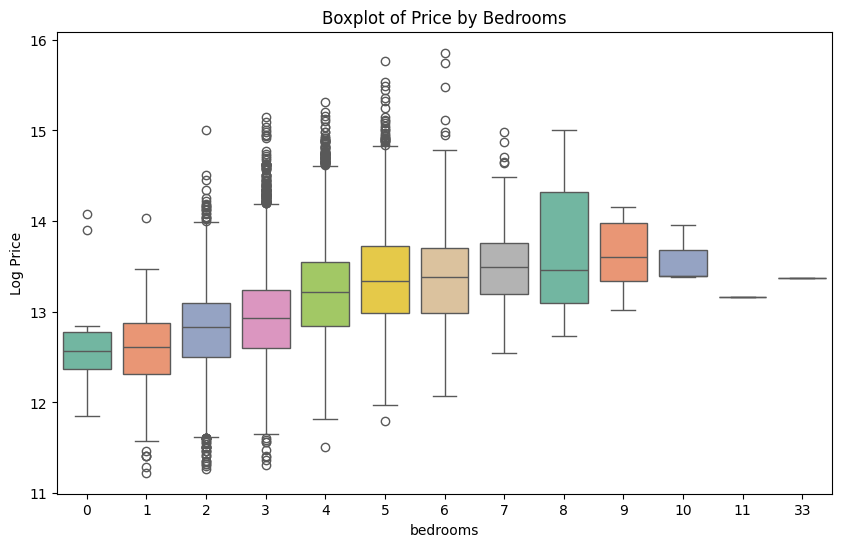

In [29]:
plot_boxplot_category(df, categorical_column='bedrooms', target_column='log_price',
                      title="Boxplot of Price by Bedrooms", x_label="bedrooms", y_label="Log Price")

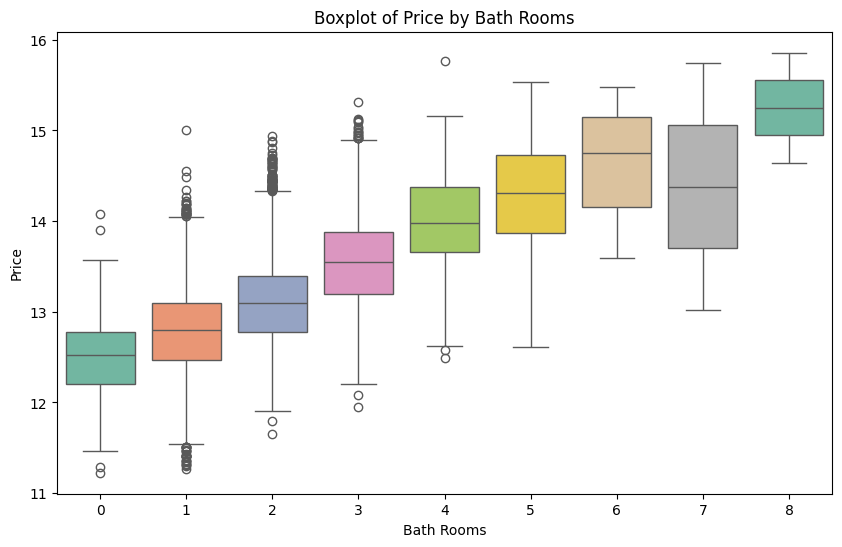

In [30]:
plot_boxplot_category(df, categorical_column='bathrooms', target_column='log_price',
                      title="Boxplot of Price by Bath Rooms", x_label="Bath Rooms", y_label="Price")

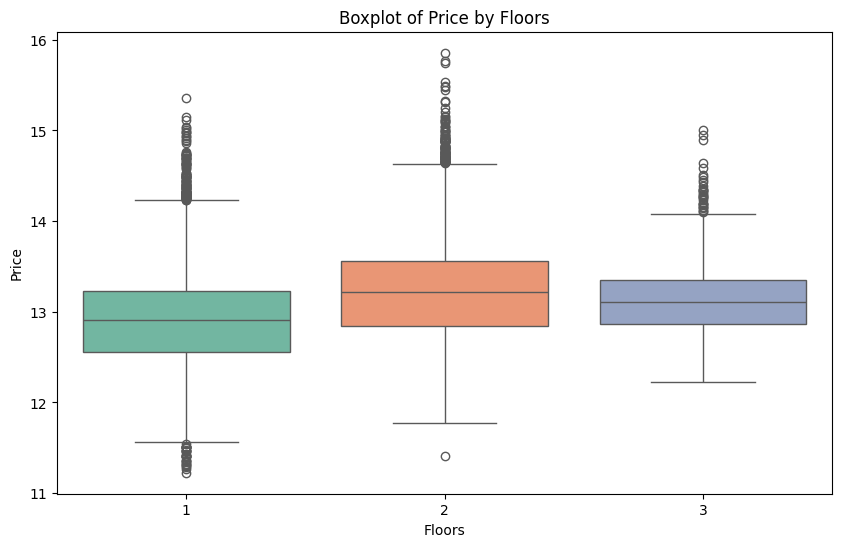

In [31]:
plot_boxplot_category(df, categorical_column='floors', target_column='log_price',
                      title="Boxplot of Price by Floors", x_label="Floors", y_label="Price")

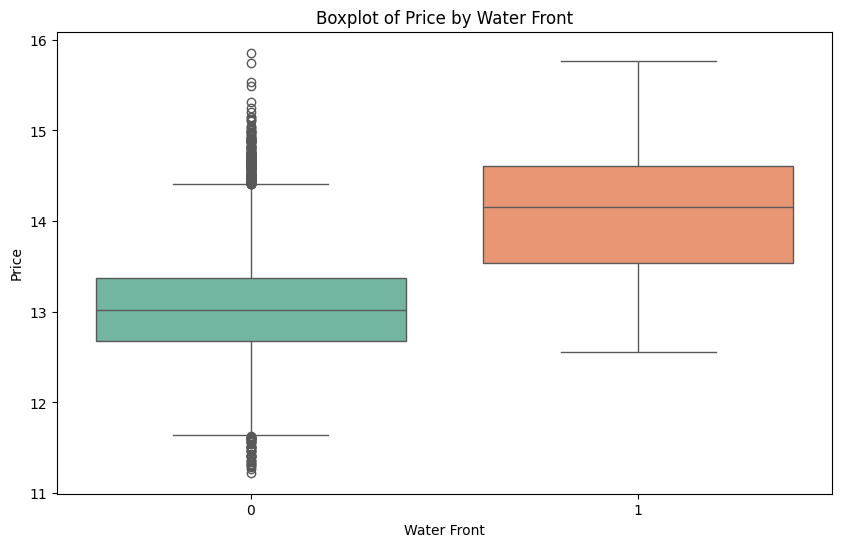

In [32]:
plot_boxplot_category(df, categorical_column='waterfront', target_column='log_price',
                      title="Boxplot of Price by Water Front", x_label="Water Front", y_label="Price")

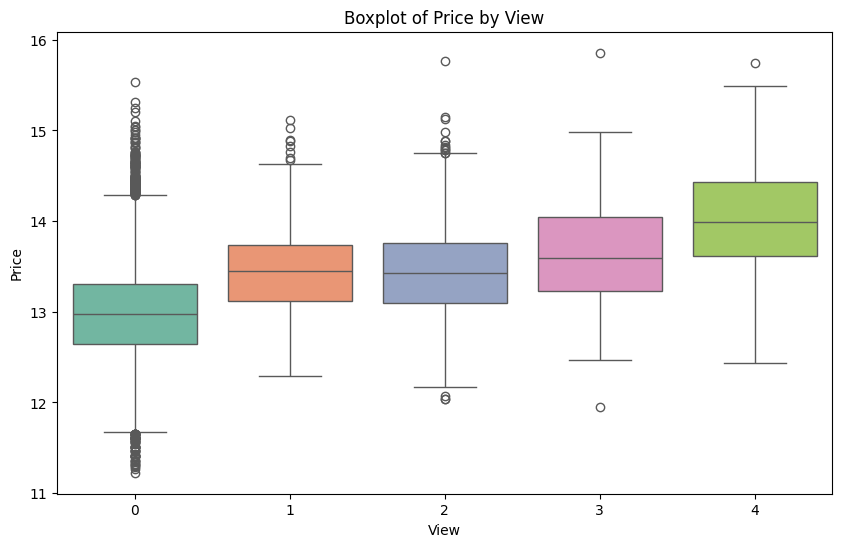

In [33]:
plot_boxplot_category(df, categorical_column='view', target_column='log_price',
                      title="Boxplot of Price by View", x_label="View", y_label="Price")

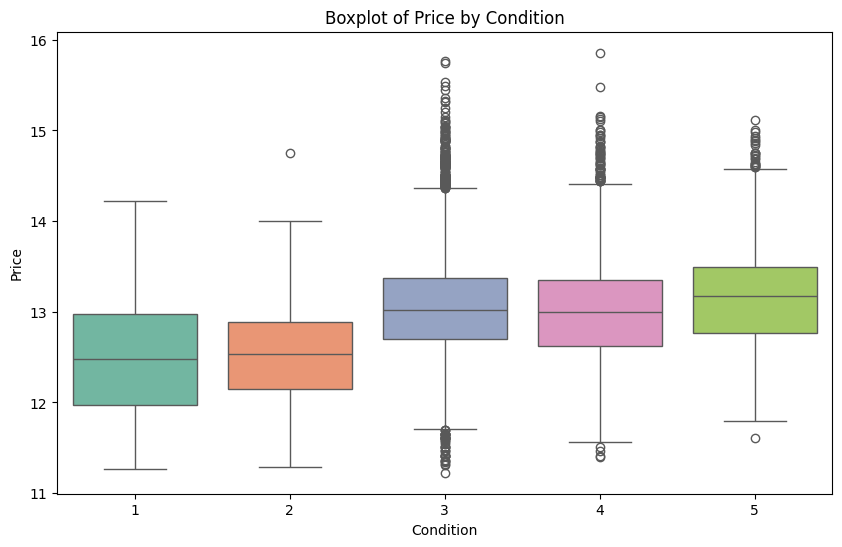

In [34]:
plot_boxplot_category(df, categorical_column='condition', target_column='log_price',
                      title="Boxplot of Price by Condition", x_label="Condition", y_label="Price")

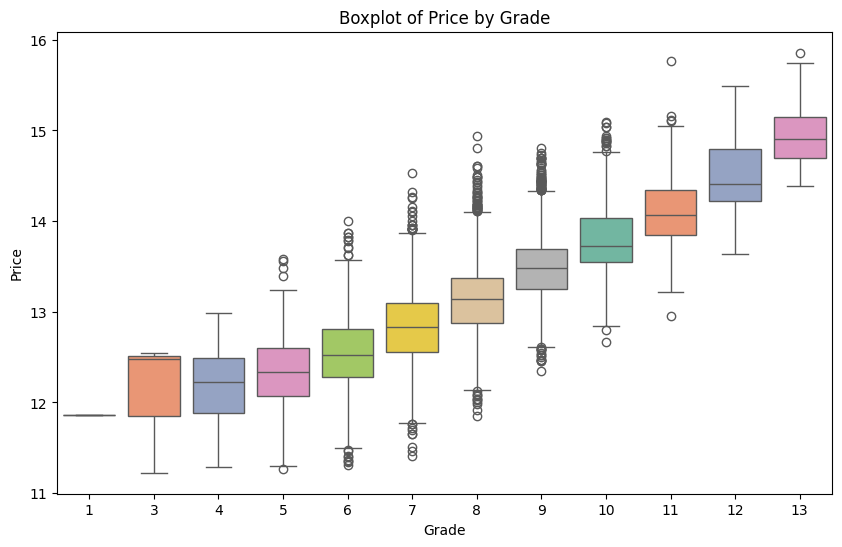

In [35]:
plot_boxplot_category(df, categorical_column='grade', target_column='log_price',
                      title="Boxplot of Price by Grade", x_label="Grade", y_label="Price")

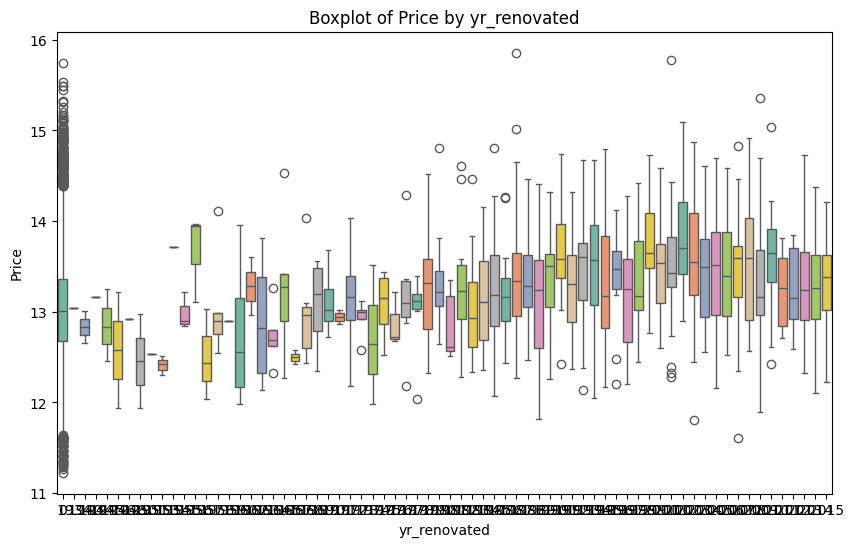

In [36]:
plot_boxplot_category(df, categorical_column='yr_renovated', target_column='log_price',
                      title="Boxplot of Price by yr_renovated", x_label="yr_renovated", y_label="Price")

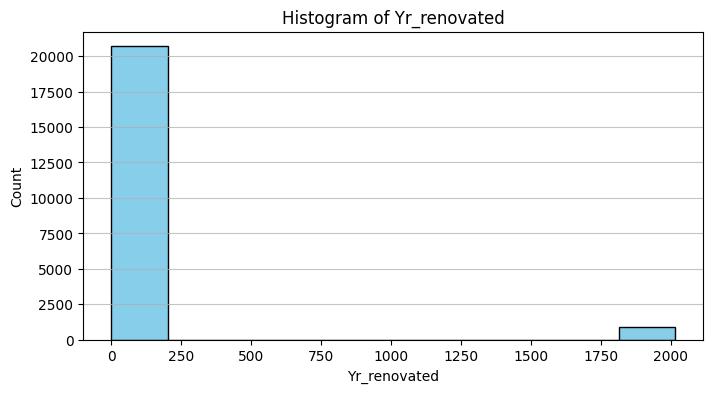

            yr_renovated yr_renovated-binned yr_renovated-binned-numeric
id                                                                      
7129300520             0               Bin 1                           1
6414100192          1991               Bin 5                           5
5631500400             0               Bin 1                           1
2487200875             0               Bin 1                           1
1954400510             0               Bin 1                           1
7237550310             0               Bin 1                           1
1321400060             0               Bin 1                           1
2008000270             0               Bin 1                           1
2414600126             0               Bin 1                           1
3793500160             0               Bin 1                           1

Value counts for binned:
yr_renovated-binned
Bin 1    20716
Bin 7      261
Bin 6      248
Bin 5      186
Bin 4      121
Bin

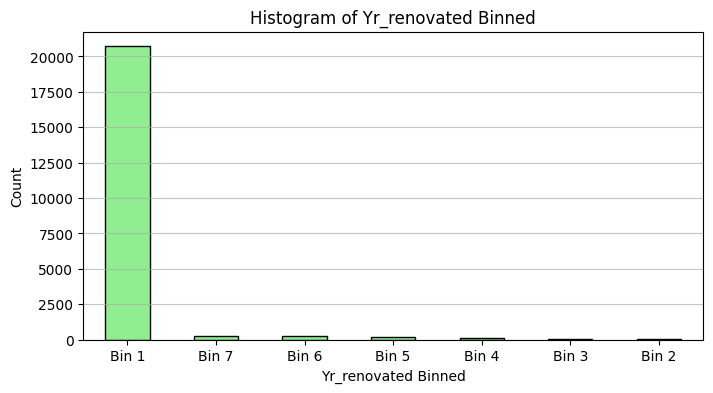

In [37]:
df = boxplot_and_convert_bin(df, column_name='yr_renovated', num_bins=7)

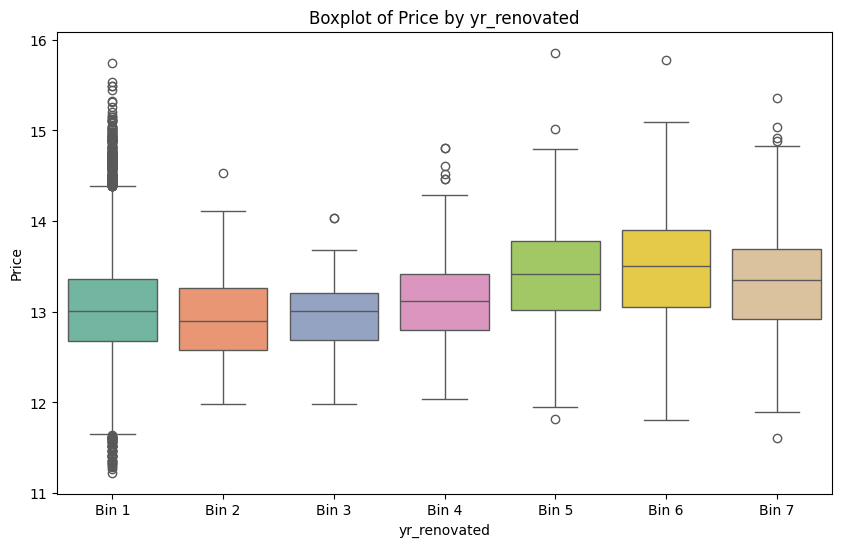

In [38]:
plot_boxplot_category(df, categorical_column='yr_renovated-binned', target_column='log_price',
                      title="Boxplot of Price by yr_renovated", x_label="yr_renovated", y_label="Price")

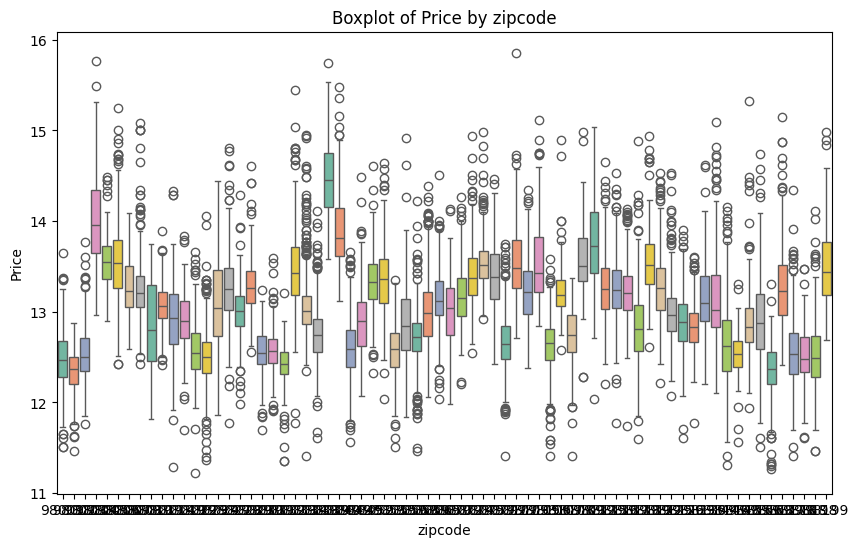

In [39]:
plot_boxplot_category(df, categorical_column='zipcode', target_column='log_price',
                      title="Boxplot of Price by zipcode", x_label="zipcode", y_label="Price")

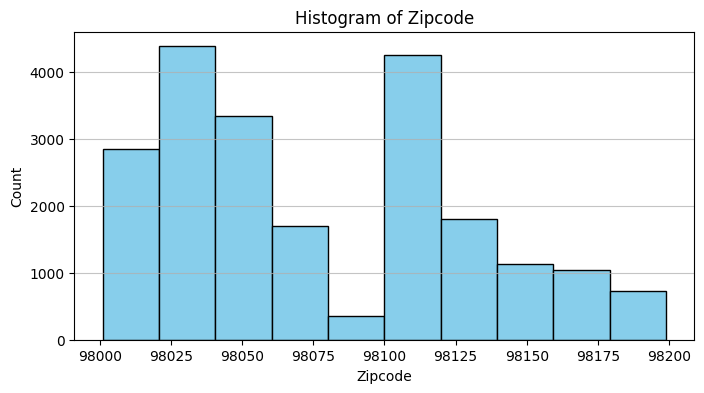

            zipcode zipcode-binned zipcode-binned-numeric
id                                                       
7129300520    98178          Bin 7                      7
6414100192    98125          Bin 6                      6
5631500400    98028          Bin 2                      2
2487200875    98136          Bin 6                      6
1954400510    98074          Bin 4                      4
7237550310    98053          Bin 3                      3
1321400060    98003          Bin 1                      1
2008000270    98198          Bin 7                      7
2414600126    98146          Bin 6                      6
3793500160    98038          Bin 3                      3

Value counts for binned:
zipcode-binned
Bin 3    3915
Bin 6    3687
Bin 4    3379
Bin 5    3014
Bin 2    2675
Bin 1    2667
Bin 7    2276
Name: count, dtype: int64


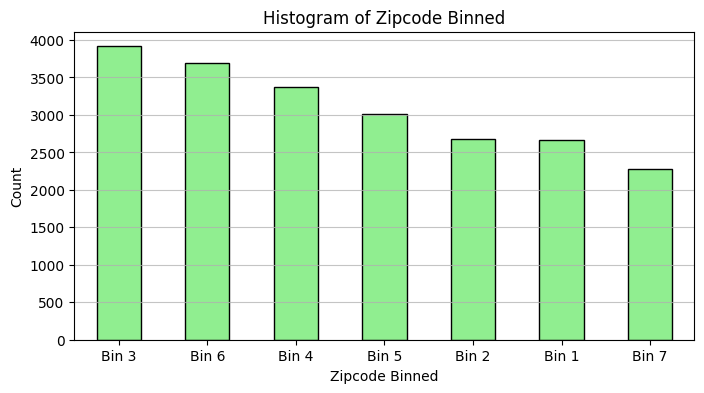

In [40]:
df = boxplot_and_convert_bin(df, column_name='zipcode', num_bins=7)

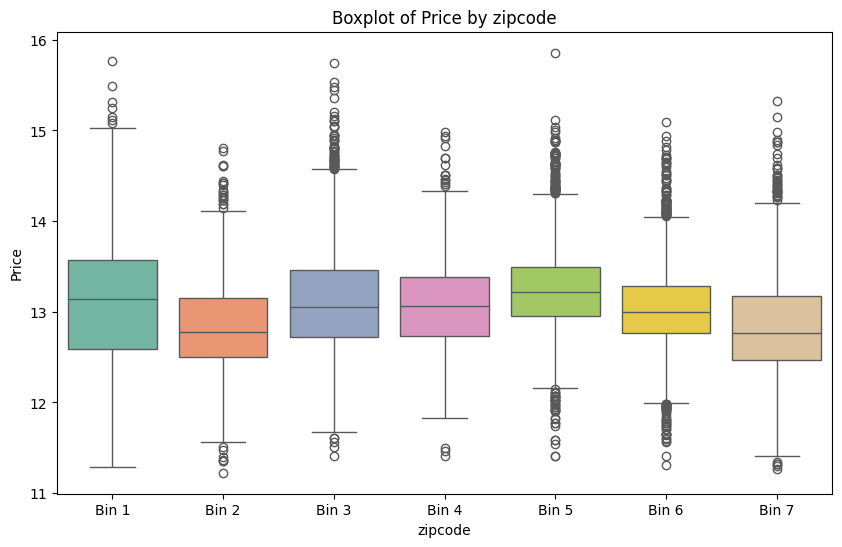

In [41]:
plot_boxplot_category(df, categorical_column='zipcode-binned', target_column='log_price',
                      title="Boxplot of Price by zipcode", x_label="zipcode", y_label="Price")

month_house_sold
5     2414
4     2231
7     2211
6     2180
8     1940
10    1878
3     1875
9     1774
12    1471
11    1411
2     1250
1      978
Name: count, dtype: int64
['10' '12' '2' '5' '6' '1' '4' '3' '7' '8' '11' '9']


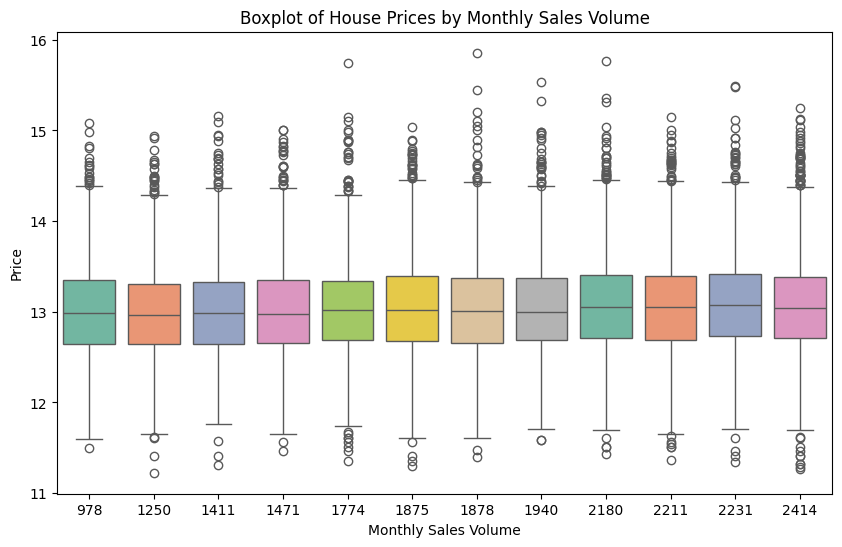

In [42]:
df['month_house_sold'] = df['date'].dt.month
df['month_house_sold'] = df['month_house_sold'].astype(str)
df['month_house_sold']
value_counts = df['month_house_sold'].value_counts()
print(value_counts)
print(df['month_house_sold'].unique())
df['month_house_sold_encoded'] = df['month_house_sold'].map(value_counts)
plot_boxplot_category(df, categorical_column='month_house_sold_encoded', target_column='log_price',
                      title="Boxplot of House Prices by Monthly Sales Volume", x_label="Monthly Sales Volume", y_label="Price")


In [43]:
df[['yr_built']].head()
df['yr_sold'] = df['date'].dt.year
df['yr_sold'] = df['yr_sold'].astype(int)
df['house_age'] = df['yr_sold'] -  df['yr_built']
df[['yr_sold', 'yr_built', 'house_age']].head()

,yr_sold,yr_built,house_age
id,,,
7129300520,2014,1955,59
6414100192,2014,1951,63
5631500400,2015,1933,82
2487200875,2014,1965,49
1954400510,2015,1987,28


In [44]:
# Distance to a Central Point
# Latitude and longitude of King County's own center of population 
pop_center = (47.548320, -122.229983)  
df['distance_to_center'] = df.apply(
    lambda row: geodesic((row['lat'], row['long']), pop_center).km, axis=1
)
df['distance_to_center'].head()

id
7129300520     4.601229
6414100192    20.331205
5631500400    21.079363
2487200875    12.649831
1954400510    15.862152
Name: distance_to_center, dtype: float64

In [45]:
coords = df[['lat', 'long']]

# Fit KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)

# Assign the cluster labels
df['geo_cluster'] = kmeans.labels_

In [46]:
# import pandas as pd
house_distance_amenities = pd.read_csv("house_distance_amenities.csv", index_col='id')
house_distance_amenities.head()

,lat,long,nearest_hospital_name,nearest_hospital_type,distance_km_hospital,nearest_university_name,nearest_university_type,distance_km_university,nearest_station_name,nearest_station_type,distance_km_station
id,,,,,,,,,,,
7129300520,47.5112,-122.257,Cascade Behavioral Health,hospital,3.939132,University of Phoenix - Western Washington Campus,university,4.824314,South Renton Park and Ride,bus_station,5.401288
6414100192,47.7210,-122.319,University of Washington Medical Center - Nort...,hospital,1.559600,PIMA Medical Institute,college,1.820426,Aurora Village Transit Center,bus_station,6.178197
5631500400,47.7379,-122.233,Fairfax Hospital,hospital,2.955235,Bastyr University,college,1.456564,Kingsgate Park & Ride,bus_station,4.146092
2487200875,47.5208,-122.393,Navos West Seattle Campus,hospital,2.523316,Highline Community College,college,3.690386,Fauntleroy Ferry Terminal Building,ferry_terminal,0.338328
1954400510,47.6168,-122.045,Swedish Hospital,hospital,7.773918,Central Washington University - Sammamish,university,1.108881,Overlake Park & Ride,bus_station,7.093464


In [47]:
house_distance_amenities = house_distance_amenities.drop(columns=['lat', 'long'])
df = df.join(house_distance_amenities)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,geo_cluster,nearest_hospital_name,nearest_hospital_type,distance_km_hospital,nearest_university_name,nearest_university_type,distance_km_university,nearest_station_name,nearest_station_type,distance_km_station
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,...,5,Cascade Behavioral Health,hospital,3.939132,University of Phoenix - Western Washington Campus,university,4.824314,South Renton Park and Ride,bus_station,5.401288
6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,...,1,University of Washington Medical Center - Nort...,hospital,1.559600,PIMA Medical Institute,college,1.820426,Aurora Village Transit Center,bus_station,6.178197
5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,...,3,Fairfax Hospital,hospital,2.955235,Bastyr University,college,1.456564,Kingsgate Park & Ride,bus_station,4.146092
2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,...,4,Navos West Seattle Campus,hospital,2.523316,Highline Community College,college,3.690386,Fauntleroy Ferry Terminal Building,ferry_terminal,0.338328
1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,...,0,Swedish Hospital,hospital,7.773918,Central Washington University - Sammamish,university,1.108881,Overlake Park & Ride,bus_station,7.093464


In [48]:
pd.options.display.max_columns = 200
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,yr_renovated-binned,yr_renovated-binned-numeric,zipcode-binned,zipcode-binned-numeric,month_house_sold,month_house_sold_encoded,yr_sold,house_age,distance_to_center,geo_cluster,nearest_hospital_name,nearest_hospital_type,distance_km_hospital,nearest_university_name,nearest_university_type,distance_km_university,nearest_station_name,nearest_station_type,distance_km_station
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,Bin 1,1,Bin 7,7,10,1878,2014,59,4.601229,5,Cascade Behavioral Health,hospital,3.939132,University of Phoenix - Western Washington Campus,university,4.824314,South Renton Park and Ride,bus_station,5.401288
6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,Bin 5,5,Bin 6,6,12,1471,2014,63,20.331205,1,University of Washington Medical Center - Nort...,hospital,1.559600,PIMA Medical Institute,college,1.820426,Aurora Village Transit Center,bus_station,6.178197
5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,Bin 1,1,Bin 2,2,2,1250,2015,82,21.079363,3,Fairfax Hospital,hospital,2.955235,Bastyr University,college,1.456564,Kingsgate Park & Ride,bus_station,4.146092
2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,Bin 1,1,Bin 6,6,12,1471,2014,49,12.649831,4,Navos West Seattle Campus,hospital,2.523316,Highline Community College,college,3.690386,Fauntleroy Ferry Terminal Building,ferry_terminal,0.338328
1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,Bin 1,1,Bin 4,4,2,1250,2015,28,15.862152,0,Swedish Hospital,hospital,7.773918,Central Washington University - Sammamish,university,1.108881,Overlake Park & Ride,bus_station,7.093464


In [49]:
df[['yr_sold', 'yr_built', 'house_age','zipcode', 'lat', 'long', 'distance_to_center', 
    'geo_cluster', 'log_price']].corr()

,yr_sold,yr_built,house_age,zipcode,lat,long,distance_to_center,geo_cluster,log_price
yr_sold,1.000000,0.001393,0.014560,0.002538,-0.029373,-0.000576,0.005169,0.027400,0.007648
yr_built,0.001393,1.000000,-0.999873,-0.348960,-0.147164,0.410990,0.209458,0.213442,0.086006
house_age,0.014560,-0.999873,1.000000,0.348964,0.146680,-0.410956,-0.209354,-0.212982,-0.085875
zipcode,0.002538,-0.348960,0.348964,1.000000,0.267014,-0.563097,-0.237405,-0.290782,-0.042534
lat,-0.029373,-0.147164,0.146680,0.267014,1.000000,-0.133808,-0.186883,-0.385677,0.449870
long,-0.000576,0.410990,-0.410956,-0.563097,-0.133808,1.000000,0.330021,0.423666,0.054522
distance_to_center,0.005169,0.209458,-0.209354,-0.237405,-0.186883,0.330021,1.000000,0.145661,-0.243930
geo_cluster,0.027400,0.213442,-0.212982,-0.290782,-0.385677,0.423666,0.145661,1.000000,-0.238751
log_price,0.007648,0.086006,-0.085875,-0.042534,0.449870,0.054522,-0.243930,-0.238751,1.000000


In [50]:
df[['date', 'month_house_sold', 'month_house_sold_encoded', 'yr_renovated', 'yr_renovated-binned-numeric', 
    'zipcode', 'zipcode-binned-numeric', 'log_price']].corr()

,date,month_house_sold,month_house_sold_encoded,yr_renovated,yr_renovated-binned-numeric,zipcode,zipcode-binned-numeric,log_price
date,1.000000,-0.348392,-0.334894,-0.024823,-0.025216,0.001859,0.002108,-0.003833
month_house_sold,-0.348392,1.000000,-0.075985,0.012955,0.011509,-0.001971,-0.001468,-0.016112
month_house_sold_encoded,-0.334894,-0.075985,1.000000,0.015815,0.019011,0.002577,0.003948,0.048037
yr_renovated,-0.024823,0.012955,0.015815,1.000000,0.947513,0.064345,0.062233,0.113669
yr_renovated-binned-numeric,-0.025216,0.011509,0.019011,0.947513,1.000000,0.060807,0.059075,0.123676
zipcode,0.001859,-0.001971,0.002577,0.064345,0.060807,1.000000,0.973332,-0.042534
zipcode-binned-numeric,0.002108,-0.001468,0.003948,0.062233,0.059075,0.973332,1.000000,-0.038578
log_price,-0.003833,-0.016112,0.048037,0.113669,0.123676,-0.042534,-0.038578,1.000000


In [51]:
df.drop(['yr_sold', 'yr_built', 'date', 'month_house_sold', 'yr_renovated', 'yr_renovated-binned', 'zipcode-binned',
        'nearest_university_name', 'nearest_university_type', 'nearest_station_name', 'nearest_station_type',
        'nearest_hospital_type', 'nearest_hospital_name'], axis = 1, inplace =True)
df.rename(columns = {'yr_renovated-binned-numeric': 'yr_renovated_binned','zipcode-binned-numeric': 'zipcode_binned', 
                     'month_house_sold_encoded': 'month_house_sold'}, inplace =True)

In [52]:
df.corr()['log_price'].sort_values()

distance_to_center       -0.243930
geo_cluster              -0.238751
distance_km_station      -0.132242
house_age                -0.085875
distance_km_hospital     -0.061956
distance_km_university   -0.046629
zipcode                  -0.042534
zipcode_binned           -0.038578
condition                 0.044017
month_house_sold          0.048037
long                      0.054522
sqft_lot15                0.092625
sqft_lot                  0.100990
yr_renovated_binned       0.123676
waterfront                0.173101
floors                    0.289251
sqft_basement             0.317102
bedrooms                  0.341530
view                      0.346646
lat                       0.449870
bathrooms                 0.511374
sqft_above                0.601936
sqft_living15             0.620282
sqft_living               0.695218
grade                     0.704366
price                     0.891125
log_price                 1.000000
Name: log_price, dtype: float64

In [53]:
df['sqft_living_ratio'] = df['sqft_living'] / (df['sqft_above'] + df['sqft_basement'] + df['sqft_lot'])
df['sqft_living15_ratio'] = df['sqft_living15'] / (df['sqft_above'] + df['sqft_basement'] + df['sqft_lot15'])

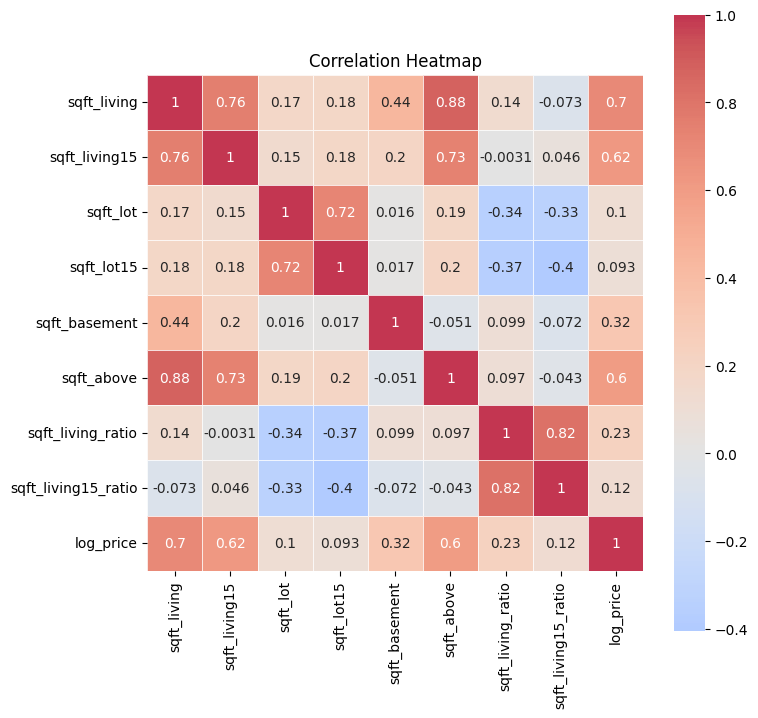

In [54]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 
                 'sqft_above', 'sqft_living_ratio', 'sqft_living15_ratio', 'log_price']
plot_corr_heatmap(df[sqft_features])

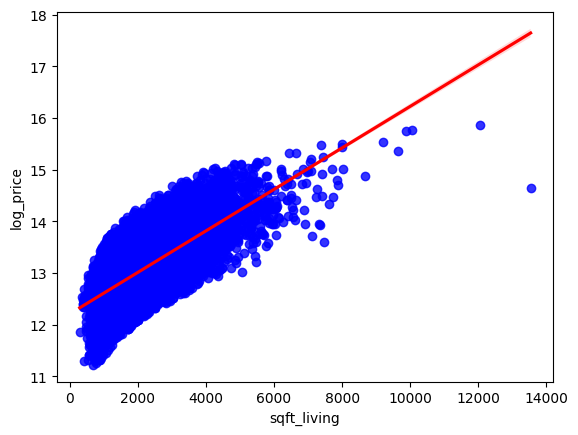

In [55]:
sns.regplot(x="sqft_living", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

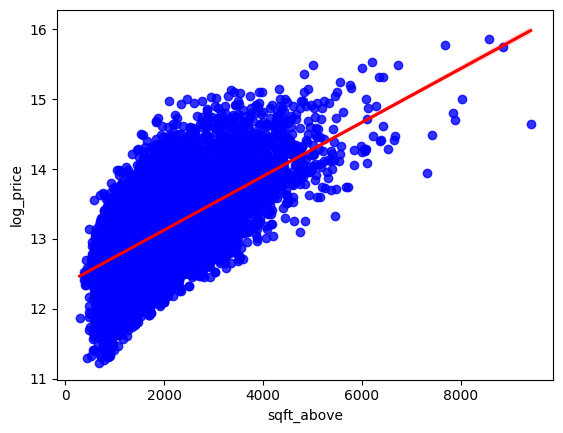

In [56]:
sns.regplot(x="sqft_above", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

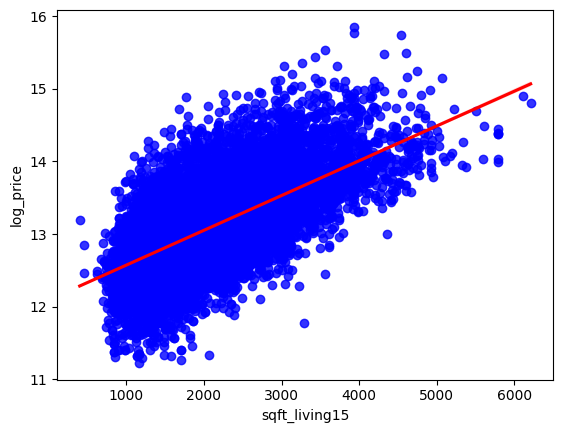

In [57]:
sns.regplot(x="sqft_living15", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

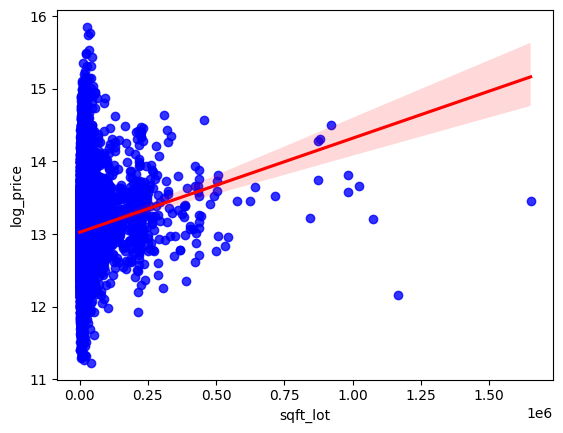

In [58]:
sns.regplot(x="sqft_lot", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

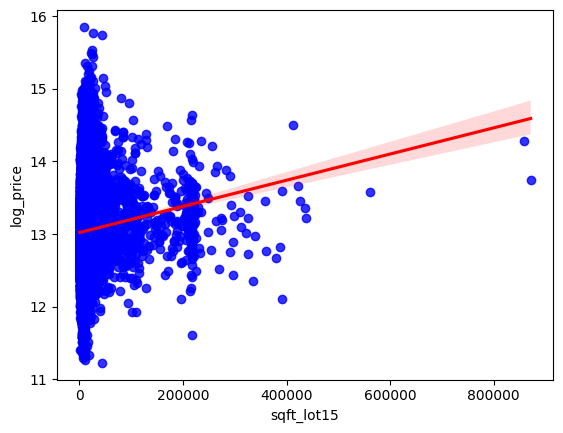

In [59]:
sns.regplot(x="sqft_lot15", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

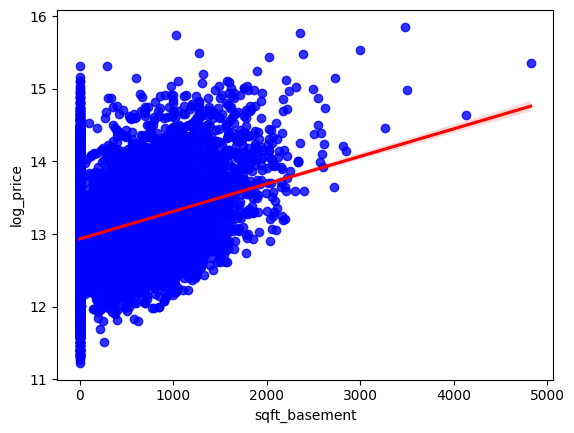

In [60]:
sns.regplot(x="sqft_basement", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

In [61]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'sqft_above']
df[sqft_features].describe()

,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_basement,sqft_above
count,21969.000000,21969.000000,2.196900e+04,21969.000000,21969.000000,21969.000000
mean,2074.334426,1983.030771,1.505021e+04,12733.700396,291.023032,1783.311393
std,917.044924,684.801400,4.118718e+04,27163.313081,442.159118,826.228751
min,290.000000,399.000000,5.200000e+02,651.000000,0.000000,290.000000
25%,1420.000000,1480.000000,5.050000e+03,5100.000000,0.000000,1190.000000
50%,1910.000000,1830.000000,7.620000e+03,7620.000000,0.000000,1560.000000
75%,2540.000000,2360.000000,1.067500e+04,10080.000000,560.000000,2200.000000
max,13540.000000,6210.000000,1.651359e+06,871200.000000,4820.000000,9410.000000


In [62]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'sqft_above']
for feature in sqft_features:
    non_positive_values = df[df[feature] <= 0]  
    if not non_positive_values.empty:
        print(f"Feature '{feature}' contains non-positive values:")
        print(non_positive_values[[feature]])

Feature 'sqft_basement' contains non-positive values:
            sqft_basement
id                       
7129300520              0
5631500400              0
1954400510              0
1321400060              0
2008000270              0
...                   ...
263000018               0
6600060120              0
1523300141              0
291310100               0
1523300157              0

[13350 rows x 1 columns]


In [63]:
df = transform_to_log(df, sqft_features)

In [64]:
df.corr()['log_price'].sort_values()

distance_to_center       -0.243930
geo_cluster              -0.238751
distance_km_station      -0.132242
house_age                -0.085875
distance_km_hospital     -0.061956
distance_km_university   -0.046629
zipcode                  -0.042534
zipcode_binned           -0.038578
condition                 0.044017
month_house_sold          0.048037
long                      0.054522
sqft_lot15                0.092625
sqft_lot                  0.100990
log_sqft_lot15            0.121774
sqft_living15_ratio       0.122835
yr_renovated_binned       0.123676
log_sqft_lot              0.136580
waterfront                0.173101
sqft_living_ratio         0.230109
log_sqft_basement         0.237466
floors                    0.289251
sqft_basement             0.317102
bedrooms                  0.341530
view                      0.346646
lat                       0.449870
bathrooms                 0.511374
log_sqft_above            0.587033
sqft_above                0.601936
log_sqft_living15   

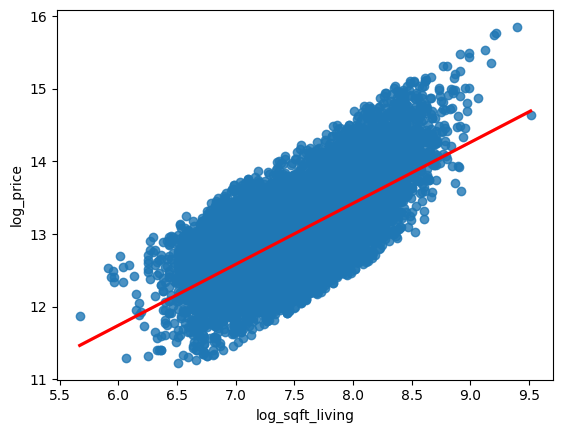

In [65]:
sns.regplot(x="log_sqft_living", y="log_price", data=df, line_kws={"color": "red"})
plt.show()

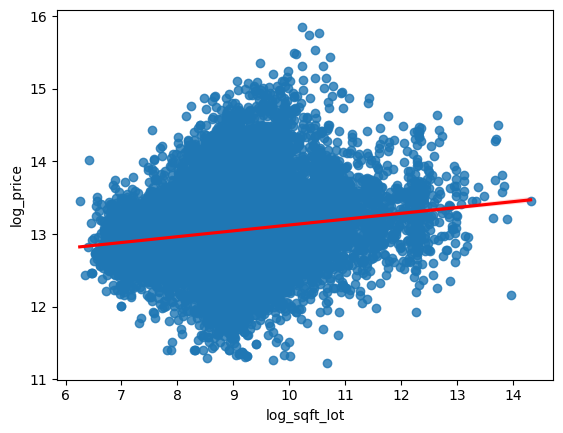

In [66]:
sns.regplot(x="log_sqft_lot", y="log_price", data=df, line_kws={"color": "red"})
plt.show()

In [67]:
summarize_dataframe(df)


Data Total Number of Each Type:
 float64     16
int64       16
category     2
int32        1
Name: count, dtype: int64

Float Types Count:
 price                      4028
lat                        5034
long                        752
log_price                  4028
distance_to_center        20832
distance_km_hospital      20832
distance_km_university    20832
distance_km_station       20832
sqft_living_ratio         19154
sqft_living15_ratio       20390
log_sqft_living            1038
log_sqft_living15           777
log_sqft_lot               9782
log_sqft_lot15             8689
log_sqft_basement           306
log_sqft_above              946
dtype: int64

Integer Types Count:
 bedrooms              13
bathrooms              9
sqft_living         1038
sqft_lot            9782
floors                 3
waterfront             2
view                   5
condition              5
grade                 12
sqft_above           946
sqft_basement        306
zipcode               70
sqft_living

In [68]:
df2 = df.copy()
df2 = convert_to_categorical(df2, min_unique=2, max_unique=7)
df2

Converted columns to categorical: ['floors', 'waterfront', 'view', 'condition']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,yr_renovated_binned,zipcode_binned,month_house_sold,house_age,distance_to_center,geo_cluster,distance_km_hospital,distance_km_university,distance_km_station,sqft_living_ratio,sqft_living15_ratio,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_sqft_basement,log_sqft_above
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,12.309982,1,7,1878,59,4.601229,5,3.939132,4.824314,5.401288,0.172767,0.196193,7.073270,7.200425,8.639411,8.639411,0.000000,7.073270
6414100192,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,13.195614,5,6,1471,63,20.331205,1,1.559600,1.820426,6.178197,0.261924,0.165540,7.851661,7.432484,8.887653,8.941022,5.991465,7.682482
5631500400,180000.0,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,12.100712,1,2,1250,82,21.079363,3,2.955235,1.456564,4.146092,0.071495,0.307971,6.646391,7.908387,9.210340,8.994917,0.000000,6.646391
2487200875,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,13.311329,1,6,1471,49,12.649831,4,2.523316,3.690386,0.338328,0.281609,0.195402,7.580700,7.215240,8.517193,8.517193,6.813445,6.956545
1954400510,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,13.142166,1,4,1250,28,15.862152,0,7.773918,1.108881,7.093464,0.172131,0.196014,7.426549,7.495542,8.997147,8.923058,0.000000,7.426549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2,1530,1131,3,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,12.793859,1,5,2414,5,18.916436,1,1.778450,1.021632,8.360616,0.574972,0.503455,7.333023,7.333023,7.030857,7.319202,0.000000,7.333023
6600060120,400000.0,4,2,2310,5813,2,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,12.899220,1,6,1250,1,10.785129,4,1.984863,1.406920,1.187892,0.284378,0.192429,7.745003,7.512071,8.667852,8.881836,0.000000,7.745003
1523300141,402101.0,2,0,1020,1350,2,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,12.904459,1,6,2180,5,7.294822,4,1.673029,0.370437,1.869760,0.430380,0.336967,6.927558,6.927558,7.207860,7.604396,0.000000,6.927558


In [69]:
df2 = encode_and_one_hot(df2)
df2

DataFrame shape before encoding: (21969, 35)
Label-encoded columns: ['waterfront']
One-hot encoded columns: ['floors', 'zipcode_binned', 'yr_renovated_binned', 'condition', 'view']
DataFrame shape after encoding: (21969, 52)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,month_house_sold,house_age,distance_to_center,geo_cluster,distance_km_hospital,distance_km_university,distance_km_station,sqft_living_ratio,sqft_living15_ratio,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_sqft_basement,log_sqft_above,floors_2,floors_3,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,yr_renovated_binned_2,yr_renovated_binned_3,yr_renovated_binned_4,yr_renovated_binned_5,yr_renovated_binned_6,yr_renovated_binned_7,zipcode_binned_2,zipcode_binned_3,zipcode_binned_4,zipcode_binned_5,zipcode_binned_6,zipcode_binned_7
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,0,7,1180,0,98178,47.5112,-122.257,1340,5650,12.309982,1878,59,4.601229,5,3.939132,4.824314,5.401288,0.172767,0.196193,7.073270,7.200425,8.639411,8.639411,0.000000,7.073270,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6414100192,538000.0,3,2,2570,7242,0,7,2170,400,98125,47.7210,-122.319,1690,7639,13.195614,1471,63,20.331205,1,1.559600,1.820426,6.178197,0.261924,0.165540,7.851661,7.432484,8.887653,8.941022,5.991465,7.682482,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
5631500400,180000.0,2,1,770,10000,0,6,770,0,98028,47.7379,-122.233,2720,8062,12.100712,1250,82,21.079363,3,2.955235,1.456564,4.146092,0.071495,0.307971,6.646391,7.908387,9.210340,8.994917,0.000000,6.646391,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2487200875,604000.0,4,3,1960,5000,0,7,1050,910,98136,47.5208,-122.393,1360,5000,13.311329,1471,49,12.649831,4,2.523316,3.690386,0.338328,0.281609,0.195402,7.580700,7.215240,8.517193,8.517193,6.813445,6.956545,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1954400510,510000.0,3,2,1680,8080,0,8,1680,0,98074,47.6168,-122.045,1800,7503,13.142166,1250,28,15.862152,0,7.773918,1.108881,7.093464,0.172131,0.196014,7.426549,7.495542,8.997147,8.923058,0.000000,7.426549,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2,1530,1131,0,8,1530,0,98103,47.6993,-122.346,1530,1509,12.793859,2414,5,18.916436,1,1.778450,1.021632,8.360616,0.574972,0.503455,7.333023,7.333023,7.030857,7.319202,0.000000,7.333023,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6600060120,400000.0,4,2,2310,5813,0,8,2310,0,98146,47.5107,-122.362,1830,7200,12.899220,1250,1,10.785129,4,1.984863,1.406920,1.187892,0.284378,0.192429,7.745003,7.512071,8.667852,8.881836,0.000000,7.745003,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1523300141,402101.0,2,0,1020,1350,0,7,1020,0,98144,47.5944,-122.299,1020,2007,12.904459,2180,5,7.294822,4,1.673029,0.370437,1.869760,0.430380,0.336967,6.927558,6.927558,7.207860,7.604396,0.000000,6.927558,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


# Model Development

In [71]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'sqft_above', 'price', 'log_price']
log_sqft_features = ['log_sqft_living', 'log_sqft_living15', 'log_sqft_lot', 'log_sqft_lot15', 'log_sqft_basement', 'log_sqft_above', 'price', 'log_price']

new_features = ['sqft_living_ratio', 'sqft_living15_ratio', 'distance_to_center', 'geo_cluster', 'house_age', 
                'month_house_sold', 'yr_renovated_binned_2', 'yr_renovated_binned_3', 'yr_renovated_binned_4',
                'yr_renovated_binned_5', 'yr_renovated_binned_6', 'yr_renovated_binned_7', 'zipcode_binned_2',
               'zipcode_binned_3', 'zipcode_binned_4', 'zipcode_binned_5', 'zipcode_binned_6', 'zipcode_binned_7']

X1 = df.drop(columns=log_sqft_features)
X2 = df2.drop(columns=log_sqft_features)

X3 = df.drop(columns=sqft_features)
X4 = df2.drop(columns=sqft_features)

# X2 = df2.drop(columns=new_features)
# X4 = df2.drop(columns=new_features)

Y = df['log_price']

In [72]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.30, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=0.30, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, Y, test_size=0.30, random_state=42)
x4_train, x4_test, y4_train, y4_test = train_test_split(X4, Y, test_size=0.30, random_state=42)
print("X train data shape:",x4_train.shape)
print("Y train data shape:",y4_train.shape)
print("X test data shape:", x4_test.shape)
print("Y test data shape:", y4_test.shape)

X train data shape: (15378, 44)
Y train data shape: (15378,)
X test data shape: (6591, 44)
Y test data shape: (6591,)


In [73]:
# R²: 0.8683
# RMSE: 137908.7350
# MAE: 77115.2407
# x3, log_price

In [74]:
lm = LinearRegression()

evaluate_model(lm, x1_train, x1_test, y1_train, y1_test, is_log_transformed=True)

R-squared Score: 0.8041
Root Mean Squared Error: 154510.1526
Mean Absolute Error: 94013.7807
Mean Absolute Percentage Error: 0.1781


In [75]:
evaluate_model(lm, x2_train, x2_test, y2_train, y2_test,is_log_transformed=True)

R-squared Score: 0.8086
Root Mean Squared Error: 152711.9902
Mean Absolute Error: 92468.8585
Mean Absolute Percentage Error: 0.1746


In [76]:
evaluate_model(lm, x3_train, x3_test, y3_train, y3_test,is_log_transformed=True)

R-squared Score: 0.8120
Root Mean Squared Error: 151361.4239
Mean Absolute Error: 91790.0332
Mean Absolute Percentage Error: 0.1748


In [77]:
evaluate_model(lm, x4_train, x4_test, y4_train, y4_test,is_log_transformed=True)

R-squared Score: 0.8161
Root Mean Squared Error: 149670.9415
Mean Absolute Error: 90264.1340
Mean Absolute Percentage Error: 0.1711


In [78]:
pr = PolynomialFeatures(degree=2, include_bias=False)
x1_train_pr = pr.fit_transform(x1_train)
x1_test_pr = pr.fit_transform(x1_test)
x2_train_pr = pr.fit_transform(x2_train)
x2_test_pr = pr.fit_transform(x2_test)
x3_train_pr = pr.fit_transform(x3_train)
x3_test_pr = pr.fit_transform(x3_test)
x4_train_pr = pr.fit_transform(x4_train)
x4_test_pr = pr.fit_transform(x4_test)

In [79]:
evaluate_model(lm, x1_train_pr, x1_test_pr, y1_train, y1_test,is_log_transformed=True)

R-squared Score: 0.8850
Root Mean Squared Error: 118354.7799
Mean Absolute Error: 69766.1107
Mean Absolute Percentage Error: 0.1349


In [80]:
evaluate_model(lm, x2_train_pr, x2_test_pr, y2_train, y2_test,is_log_transformed=True)

R-squared Score: -2402372982457.1685
Root Mean Squared Error: 541014486625.3869
Mean Absolute Error: 9198241816.0147
Mean Absolute Percentage Error: 16817.1593


In [81]:
evaluate_model(lm, x3_train_pr, x3_test_pr, y3_train, y3_test,is_log_transformed=True)

R-squared Score: 0.8916
Root Mean Squared Error: 114925.5779
Mean Absolute Error: 68674.4016
Mean Absolute Percentage Error: 0.1323


In [82]:
# evaluate_model(lm, x4_train_pr, x4_test_pr, y4_train, y4_test,is_log_transformed=True)

In [83]:
print("X train data shape:",x3_train.shape)

X train data shape: (15378, 27)


# Model Evaluation and Refinement


Processing degree 2: 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]


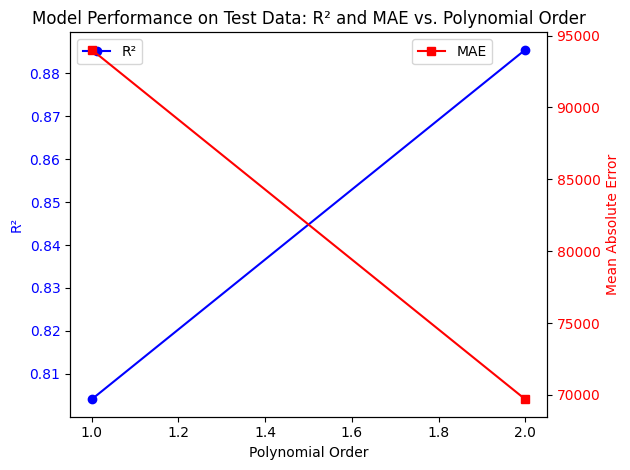

Cross-Validation Results:
Degree 1: Mean R² = 0.8111, Std = 0.0116
Degree 2: Mean R² = 0.8795, Std = 0.0090

Best Model (Test Data):
Best polynomial order: 2
Highest R²: 0.8855
Lowest MSE: 69693.8248

Best Model (Cross-Validation):
Best polynomial order: 2
Mean R²: 0.8795
Standard Deviation: 0.0090


In [85]:

from tqdm import tqdm

Rsqu_test = []
MAE_test = []
CV_scores_mean = []
CV_scores_std = []

order = [1, 2]
pbar = tqdm(order)

for n in pbar:
    # Update progress bar description
    pbar.set_description(f"Processing degree {n}")
    
    # Create pipeline
    pipe = Pipeline([
        ('scaler', RobustScaler()),
        ('poly', PolynomialFeatures(degree=n, include_bias=False)),
        ('linear', LinearRegression())
    ])

    pipe.fit(x1_train, y1_train)

    # Evaluate and reverse log transformation
    y_pred_log = pipe.predict(x1_test)
    y_pred = np.exp(y_pred_log)
    y_true = np.exp(y1_test)
                           
    
    Rsqu_test.append(r2_score(y_true, y_pred))
    MAE_test.append(mean_absolute_error(y_true, y_pred))
   
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipe, x1_train, y1_train, cv=5, scoring='r2')
    CV_scores_mean.append(cv_scores.mean())
    CV_scores_std.append(cv_scores.std())

# Plot R² and MSE
fig, ax1 = plt.subplots()

# R² Plot
ax1.plot(order, Rsqu_test, 'b-o', label="R²")
ax1.set_xlabel("Polynomial Order")
ax1.set_ylabel("R²", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc='upper left')

# MSE Plot
ax2 = ax1.twinx()
ax2.plot(order, MAE_test, 'r-s', label="MAE")
ax2.set_ylabel("Mean Absolute Error", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1))

# Add title
plt.title("Model Performance on Test Data: R² and MAE vs. Polynomial Order")
fig.tight_layout()
plt.show()

# Cross-Validation Results
print("Cross-Validation Results:")
for i, n in enumerate(order):
    print(f"Degree {n}: Mean R² = {CV_scores_mean[i]:.4f}, Std = {CV_scores_std[i]:.4f}")

# Output the best combination based on R² and MAE
best_index = max(range(len(Rsqu_test)), key=lambda i: (Rsqu_test[i], -MAE_test[i]))
print("\nBest Model (Test Data):")
print(f"Best polynomial order: {order[best_index]}")
print(f"Highest R²: {Rsqu_test[best_index]:.4f}")
print(f"Lowest MSE: {MAE_test[best_index]:.4f}")

# Output the best cross-validated score
best_cv_index = max(range(len(CV_scores_mean)), key=lambda i: CV_scores_mean[i])
print("\nBest Model (Cross-Validation):")
print(f"Best polynomial order: {order[best_cv_index]}")
print(f"Mean R²: {CV_scores_mean[best_cv_index]:.4f}")
print(f"Standard Deviation: {CV_scores_std[best_cv_index]:.4f}")

In [86]:
# Best Model (Test Data):
# Best polynomial order: 2
# Highest R²: 0.8914
# Lowest MSE: 68683.7407

# Best Model (Cross-Validation):
# Best polynomial order: 2
# Mean R²: 0.8796
# Standard Deviation: 0.0092

# X3, log_price

# Ridge Regression

In [88]:

pipe = Pipeline([ 
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=0.1))
])

pipe.fit(x3_train,y3_train)

Y_pred_log = pipe.predict(x3_test)
Y_pred = np.exp(Y_pred_log)
Y_true = np.exp(y3_test)

r2_score_value = r2_score(Y_true, Y_pred)
mse = mean_squared_error(Y_true, Y_pred)
mae = mean_absolute_error(Y_true, Y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2_score_value:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# R²: 0.8920
# RMSE: 114720.1253
# MAE: 68664.9320

R²: 0.8920
RMSE: 114720.1253
MAE: 68664.9320


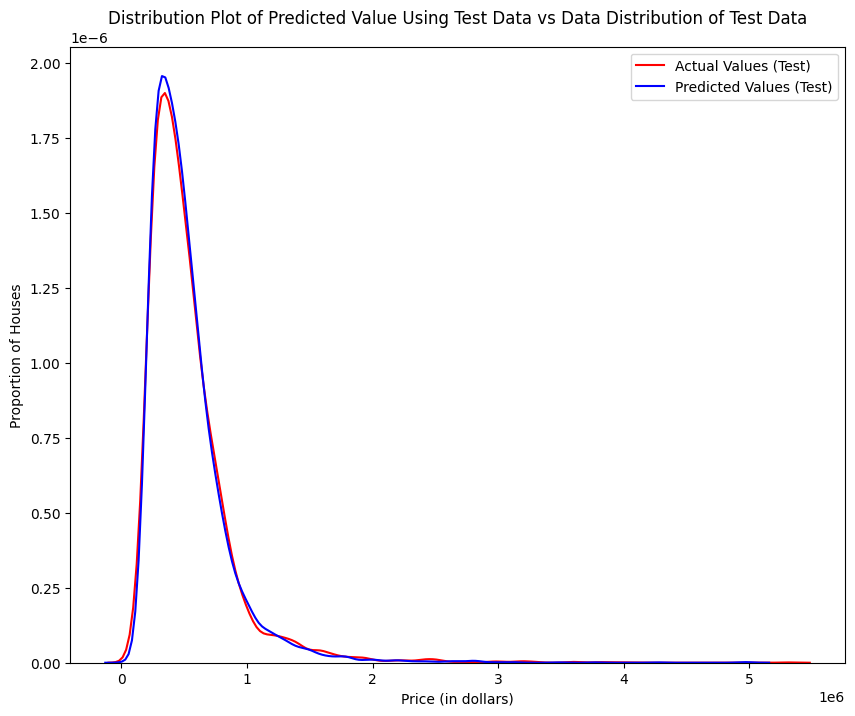

In [89]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(Y_true, Y_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

Processing degree 3: 100%|██████████| 3/3 [00:30<00:00, 10.07s/it]


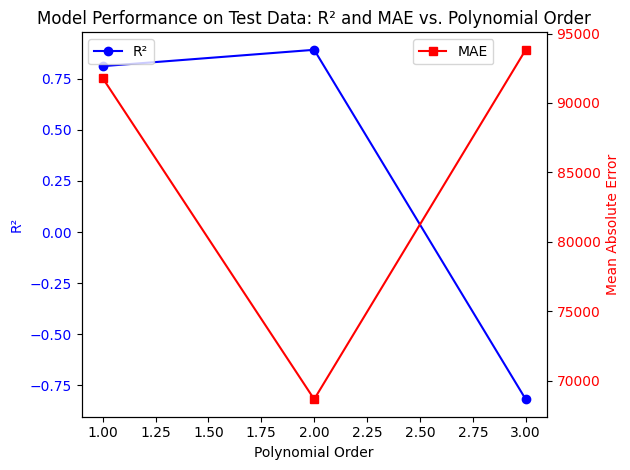

Cross-Validation Results:
Degree 1: Mean R² = 0.8181, Std = 0.0105
Degree 2: Mean R² = 0.8796, Std = 0.0091
Degree 3: Mean R² = -0.7347, Std = 2.7390

Best Model (Test Data):
Best polynomial order: 2
Highest R²: 0.8920
Lowest MSE: 68664.9320

Best Model (Cross-Validation):
Best polynomial order: 2
Mean R²: 0.8796
Standard Deviation: 0.0091


In [90]:

from tqdm import tqdm

Rsqu_test = []
MAE_test = []
CV_scores_mean = []
CV_scores_std = []

order = [1, 2, 3]
pbar = tqdm(order)

for n in pbar:
    # Update progress bar description
    pbar.set_description(f"Processing degree {n}")
    
    # Create pipeline
    pipe = Pipeline([
        ('scaler', RobustScaler()),
        ('poly', PolynomialFeatures(degree=n, include_bias=False)),
        ('linear', Ridge(alpha=0.1))
    ])

    pipe.fit(x3_train, y3_train)

    # Evaluate and reverse log transformation
    y3_pred_log = pipe.predict(x3_test)
    y3_pred = np.exp(y3_pred_log)
    y3_true = np.exp(y3_test)
                           
    
    Rsqu_test.append(r2_score(y3_true, y3_pred))
    MAE_test.append(mean_absolute_error(y3_true, y3_pred))
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipe, x3_train, y3_train, cv=5, scoring='r2')
    CV_scores_mean.append(cv_scores.mean())
    CV_scores_std.append(cv_scores.std())

# Plot R² and MSE
fig, ax1 = plt.subplots()

# R² Plot
ax1.plot(order, Rsqu_test, 'b-o', label="R²")
ax1.set_xlabel("Polynomial Order")
ax1.set_ylabel("R²", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc='upper left')

# MSE Plot
ax2 = ax1.twinx()
ax2.plot(order, MAE_test, 'r-s', label="MAE")
ax2.set_ylabel("Mean Absolute Error", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1))

# Add title
plt.title("Model Performance on Test Data: R² and MAE vs. Polynomial Order")
fig.tight_layout()
plt.show()

# Cross-Validation Results
print("Cross-Validation Results:")
for i, n in enumerate(order):
    print(f"Degree {n}: Mean R² = {CV_scores_mean[i]:.4f}, Std = {CV_scores_std[i]:.4f}")

# Output the best combination based on R² and MAE
best_index = max(range(len(Rsqu_test)), key=lambda i: (Rsqu_test[i], -MAE_test[i]))
print("\nBest Model (Test Data):")
print(f"Best polynomial order: {order[best_index]}")
print(f"Highest R²: {Rsqu_test[best_index]:.4f}")
print(f"Lowest MSE: {MAE_test[best_index]:.4f}")

# Output the best cross-validated score
best_cv_index = max(range(len(CV_scores_mean)), key=lambda i: CV_scores_mean[i])
print("\nBest Model (Cross-Validation):")
print(f"Best polynomial order: {order[best_cv_index]}")
print(f"Mean R²: {CV_scores_mean[best_cv_index]:.4f}")
print(f"Standard Deviation: {CV_scores_std[best_cv_index]:.4f}")

# Grid Search

In [92]:
# Define hyperparameter space
alpha_values = np.logspace(-4, 4, 100)  

# Set up the pipeline
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),  
    ('ridge', Ridge())
])

param_distributions = {
    'ridge__alpha': alpha_values,
    'poly__degree': [2]  
}

random_search = RandomizedSearchCV(
    pipe,
    param_distributions,
    n_iter=30,  
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(x3_train, y3_train)

best_alpha = random_search.best_params_['ridge__alpha']
best_degree = random_search.best_params_['poly__degree']
best_model = random_search.best_estimator_
best_cv_score = random_search.best_score_


Y_pred_log = best_model.predict(x3_test)
Y_pred = np.exp(Y_pred_log)
Y_true = np.exp(y3_test)

r2_score_value = r2_score(Y_true, Y_pred)
mse = mean_squared_error(Y_true, Y_pred)
mae = mean_absolute_error(Y_true, Y_pred)
mape = mean_absolute_percentage_error(Y_true, Y_pred)
rmse = np.sqrt(mse)

print(f"Best Alpha: {best_alpha:.6f}")
print(f"Best Polynomial Degree: {best_degree}")
print(f"Highest Cross-Validated R²: {best_cv_score:.4f}")

print(f"R-squared Score: {r2_score_value:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Alpha: 0.432876
Best Polynomial Degree: 2
Highest Cross-Validated R²: 0.8797
R-squared Score: 0.8928
Root Mean Squared Error: 114298.3967
Mean Absolute Error: 68591.0618
Mean Absolute Percentage Error: 0.1323


### Analyze the results

In [94]:
results = random_search.cv_results_
sorted_results = sorted(zip(results['mean_test_score'], results['param_ridge__alpha'], results['param_poly__degree']), reverse=True)
for score, alpha, degree in sorted_results[:10]:  
    print(f"R²: {score:.4f}, Alpha: {alpha}, Degree: {degree}")


R²: 0.8797, Alpha: 0.43287612810830617, Degree: 2
R²: 0.8797, Alpha: 0.3593813663804629, Degree: 2
R²: 0.8797, Alpha: 0.24770763559917114, Degree: 2
R²: 0.8797, Alpha: 0.1707352647470692, Degree: 2
R²: 0.8796, Alpha: 0.14174741629268062, Degree: 2
R²: 0.8796, Alpha: 1.9179102616724888, Degree: 2
R²: 0.8796, Alpha: 0.00021049041445120198, Degree: 2
R²: 0.8796, Alpha: 0.0001, Degree: 2
R²: 0.8796, Alpha: 2.782559402207126, Degree: 2
R²: 0.8796, Alpha: 0.0005336699231206312, Degree: 2


### Refine the search 

In [96]:
param_grid = {
    'ridge__alpha': np.linspace(best_alpha - 0.1, best_alpha + 0.1, 10),
    'poly__degree': [best_degree - 1, best_degree, best_degree + 1]
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(x3_train, y3_train)

print(f"Best Grid Search Alpha: {grid_search.best_params_['ridge__alpha']}")
print(f"Best Grid Search Degree: {grid_search.best_params_['poly__degree']}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Grid Search Alpha: 0.5328761281083062
Best Grid Search Degree: 2


### Evaluate the best model

In [98]:

best_alpha = grid_search.best_params_['ridge__alpha']
best_degree = grid_search.best_params_['poly__degree']
best_model = grid_search.best_estimator_
best_cv_score = grid_search.best_score_

Y_pred_log = best_model.predict(x3_test)
Y_pred = np.exp(Y_pred_log)
Y_true = np.exp(y3_test)

r2_score_value = r2_score(Y_true, Y_pred)
mse = mean_squared_error(Y_true, Y_pred)
mae = mean_absolute_error(Y_true, Y_pred)
mape = mean_absolute_percentage_error(Y_true, Y_pred)
rmse = np.sqrt(mse)

print(f"Best Alpha: {best_alpha:.6f}")
print(f"Best Polynomial Degree: {best_degree}")
print(f"Highest Cross-Validated R²: {best_cv_score:.4f}")
print(f"R-squared Score: {r2_score_value:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}")

Best Alpha: 0.532876
Best Polynomial Degree: 2
Highest Cross-Validated R²: 0.8797
R-squared Score: 0.8929
Root Mean Squared Error: 114226.8403
Mean Absolute Error: 68574.9598
Mean Absolute Percentage Error: 0.1323


In [99]:
# Comparing Predictions with Actual Outcomes
print("\nComparing Predictions with Actual Outcomes:\n")
print(f"{'Index':<5} {'Actual':<10} {'Predicted':<10} {'Difference':<10}")
print("-" * 35)

for i in range(5):  
    actual = Y_true.iloc[i] if hasattr(Y_true, "iloc") else Y_true[i]
    predicted = Y_pred[i]
    difference = abs(actual - predicted)
    print(f"{i:<5} {actual:<10.2f} {predicted:<10.2f} {difference:<10.2f}")



Comparing Predictions with Actual Outcomes:

Index Actual     Predicted  Difference
-----------------------------------
0     731500.00  650236.47  81263.53  
1     373000.00  404139.51  31139.51  
2     440000.00  439827.37  172.63    
3     859950.00  785118.67  74831.33  
4     416500.00  723737.61  307237.61 


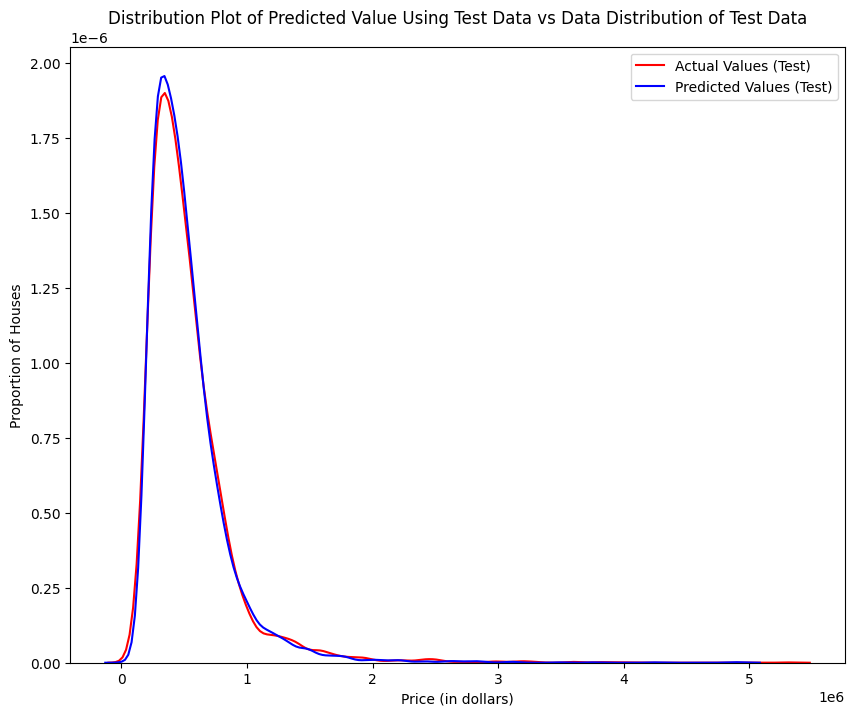

In [100]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(Y_true,Y_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

### Feature importance and diagnostics

In [102]:
# Best Alpha: 0.011211
# Best Polynomial Degree: 2
# Highest Cross-Validated R²: 0.8723
# R²: 0.8704
# RMSE: 136796.1625
# MAE: 76877.9278

In [103]:
from tabulate import tabulate  

ridge_model = best_model.named_steps['ridge']
poly_transformer = best_model.named_steps['poly']

original_feature_names = x3_train.columns
feature_names = poly_transformer.get_feature_names_out(input_features=original_feature_names)

print("Original feature names count:", original_feature_names.nunique())
print(original_feature_names)
print("\nPoly feature names count:", len(np.unique(feature_names)))

coefficients = ridge_model.coef_

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# Sort by absolute value of the coefficient in descending order
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

print(tabulate(coeff_df[['Feature', 'Coefficient']], headers=["Feature", "Coefficient"], tablefmt="grid"))

# Save the results to a CSV file
# Uncomment the lines below if saving is required
# import pandas as pd
# coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
# coeff_df.to_csv("ridge_model_coefficients.csv", index=False)
# print("\nCoefficients saved to 'ridge_model_coefficients.csv'")



Original feature names count: 27
Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'zipcode', 'lat', 'long', 'yr_renovated_binned',
       'zipcode_binned', 'month_house_sold', 'house_age', 'distance_to_center',
       'geo_cluster', 'distance_km_hospital', 'distance_km_university',
       'distance_km_station', 'sqft_living_ratio', 'sqft_living15_ratio',
       'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot',
       'log_sqft_lot15', 'log_sqft_basement', 'log_sqft_above'],
      dtype='object')

Poly feature names count: 405
+-----+---------------------------------------------+---------------+
|     | Feature                                     |   Coefficient |
+=====+=============================================+===============+
| 221 | lat distance_to_center                      |  -0.60889     |
+-----+---------------------------------------------+---------------+
| 202 | zipcode distance_to_center                  |   0.451782    

#### SHAP values

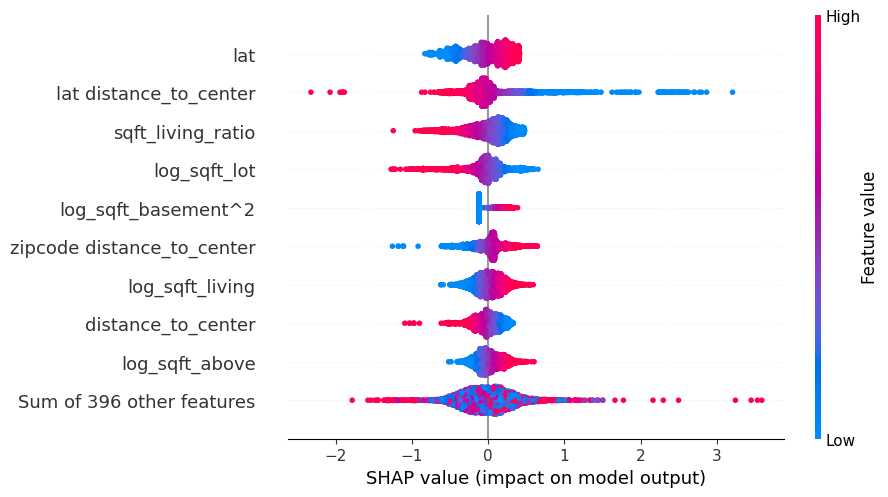

<Figure size 640x480 with 0 Axes>

In [105]:
import shap

scaler = best_model.named_steps['scaler']
poly = best_model.named_steps['poly']

x3_train_transformed = poly.transform(scaler.transform(x3_train))
x3_test_transformed = poly.transform(scaler.transform(x3_test))

# Get the polynomial feature names
poly_feature_names = poly_transformer.get_feature_names_out(input_features=x3_train.columns)

explainer = shap.Explainer(best_model.named_steps['ridge'], x3_train_transformed)

shap_values = explainer(x3_test_transformed)

# Assign the correct feature names
shap_values.feature_names = list(poly_feature_names)

shap.plots.beeswarm(shap_values)

plt.savefig("shap_summary_plot.png", bbox_inches='tight') 

plt.show()


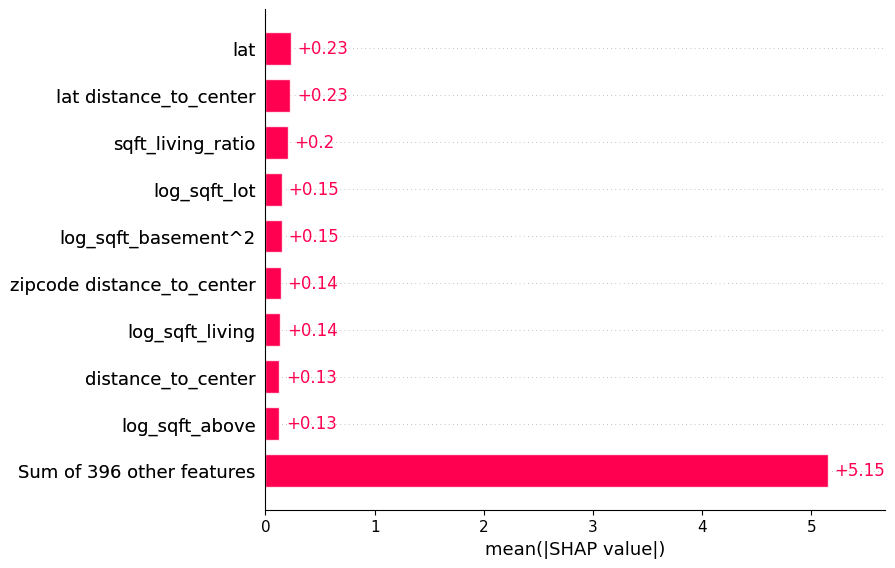

In [106]:
shap.plots.bar(shap_values)

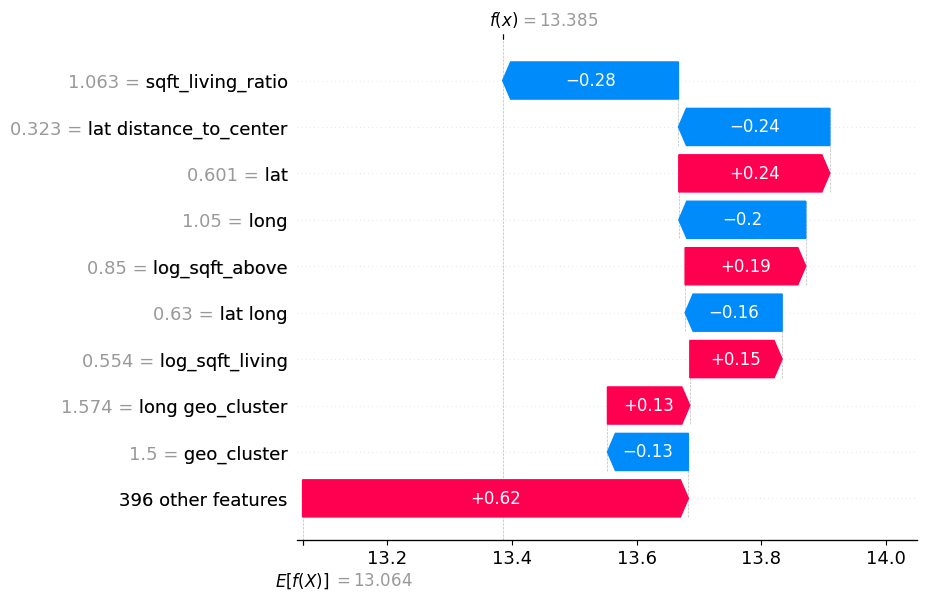

In [107]:
shap.plots.waterfall(shap_values[0])

Analyze residuals to check for biases in the predictions

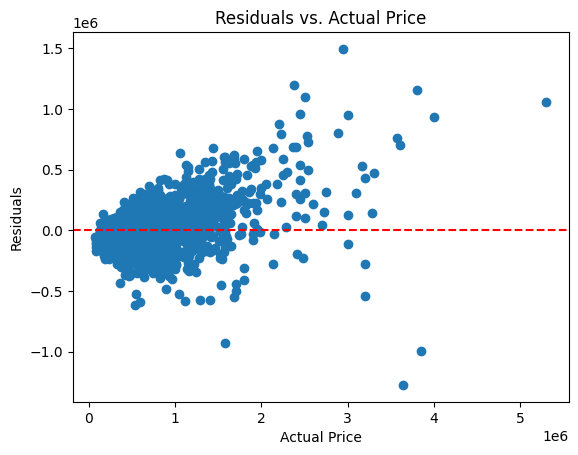

In [109]:

residuals = Y_true - Y_pred
plt.scatter(Y_true, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actual Price")
plt.savefig("residuals_plot.png", bbox_inches='tight') 
plt.show()


In [110]:
index=residuals[residuals<-2500000].index
print(index)
print(Y_true.loc[index])
x3_test.loc[index]

Index([], dtype='int64', name='id')
Series([], Name: log_price, dtype: float64)


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yr_renovated_binned,zipcode_binned,month_house_sold,house_age,distance_to_center,geo_cluster,distance_km_hospital,distance_km_university,distance_km_station,sqft_living_ratio,sqft_living15_ratio,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_sqft_basement,log_sqft_above
id,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### Insights:
Residuals seem to be randomly distributed around 0.

In [221]:
print(y3_test.head())
x3_test.head()

id
7203190110    13.502852
2122059206    12.829334
5013500400    12.994530
2862500070    13.664630
8887001640    12.939642
Name: log_price, dtype: float64


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yr_renovated_binned,zipcode_binned,month_house_sold,house_age,distance_to_center,geo_cluster,distance_km_hospital,distance_km_university,distance_km_station,sqft_living_ratio,sqft_living15_ratio,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_sqft_basement,log_sqft_above
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
7203190110,4,2,2,0,0,3,8,98053,47.6945,-122.018,1,3,2231,2,22.761038,9,6.412761,9.433380,6.653330,0.363312,0.340689,7.882315,7.878534,8.443331,8.536800,0.000000,7.882315
2122059206,5,2,2,0,0,3,8,98042,47.3727,-122.177,1,3,2414,8,19.929891,8,5.731760,4.584286,4.404563,0.344507,0.260550,8.006701,7.757906,8.649974,8.696176,0.000000,8.006701
5013500400,4,1,1,0,0,3,7,98116,47.5710,-122.392,1,5,1875,65,12.451112,4,4.503566,3.928579,5.302020,0.177384,0.162602,7.272398,7.185387,8.806574,8.806574,5.991465,6.946976
2862500070,6,4,2,0,0,3,9,98074,47.6236,-122.023,1,4,1471,0,17.676493,0,8.194566,1.683511,8.068266,0.326791,0.299573,8.064636,8.080237,8.787373,8.936167,0.000000,8.064636
8887001640,4,2,2,0,0,4,8,98070,47.5003,-122.465,1,4,1411,23,18.486556,4,8.352277,9.219858,1.143742,0.054121,0.046623,7.731931,7.549609,10.592827,10.557686,0.000000,7.731931


In [113]:
# Extract row of Y and X
first_row_y = y3_test.head(1)  
json_result_y = first_row_y.to_json(orient="records") 
print(json_result_y)

first_row_x = x3_test.head(1)  
json_result_x = first_row_x.to_json(orient="records")  
print(json_result_x)

[13.5028524994]
[{"bedrooms":4,"bathrooms":2,"floors":2,"waterfront":0,"view":0,"condition":3,"grade":8,"zipcode":98053,"lat":47.6945,"long":-122.018,"yr_renovated_binned":1,"zipcode_binned":3,"month_house_sold":2231,"house_age":2,"distance_to_center":22.761038373,"geo_cluster":9,"distance_km_hospital":6.412760697,"distance_km_university":9.4333795837,"distance_km_station":6.6533302605,"sqft_living_ratio":0.3633123115,"sqft_living15_ratio":0.3406891212,"log_sqft_living":7.882314919,"log_sqft_living15":7.8785341961,"log_sqft_lot":8.4433313428,"log_sqft_lot15":8.5367997211,"log_sqft_basement":0.0,"log_sqft_above":7.882314919}]


# Save the model

In [115]:
original_feature_names = x3_train.columns  
list(original_feature_names)


['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode',
 'lat',
 'long',
 'yr_renovated_binned',
 'zipcode_binned',
 'month_house_sold',
 'house_age',
 'distance_to_center',
 'geo_cluster',
 'distance_km_hospital',
 'distance_km_university',
 'distance_km_station',
 'sqft_living_ratio',
 'sqft_living15_ratio',
 'log_sqft_living',
 'log_sqft_living15',
 'log_sqft_lot',
 'log_sqft_lot15',
 'log_sqft_basement',
 'log_sqft_above']

In [116]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_pipeline_model.pkl')


['best_pipeline_model.pkl']